#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia  y Analitica de datos**
###Tecnológico de Monterrey

## **Actividad RETO: Aguas superficie**

**Nombres y matrículas de los integrantes del equipo:**

*   Elmer Ali Payró Costilla A01014943
*   Maria Fernanda Prieto Vargas A01794329

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [66]:
data = pd.read_csv('datos/agua_superficiales.csv',index_col=0, encoding='latin-1')

In [67]:
data.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [68]:
data.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [69]:
data.mean()

C:\Users\elmer\AppData\Local\Temp\ipykernel_15440\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4141 entries, DLAGU8 to nan
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   ESTADO                  3493 non-null   object 
 3   MUNICIPIO               3493 non-null   object 
 4   CUENCA                  3492 non-null   object 
 5   CUERPO DE AGUA          3479 non-null   object 
 6   TIPO                    3493 non-null   object 
 7   SUBTIPO                 3479 non-null   object 
 8   LONGITUD                3493 non-null   float64
 9   LATITUD                 3493 non-null   float64
 10  PERIODO                 3493 non-null   float64
 11  DBO_mg/L                2581 non-null   object 
 12  CALIDAD_DBO             2581 non-null   object 
 13  DQO_mg/L                2581 non-null   object 
 14  CALIDAD_DQO             2581 non-null   o

In [71]:
data.columns

Index(['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'CUENCA',
       'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO',
       'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L',
       'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUM

In [72]:
data.drop_duplicates(inplace=True)
print (f'tamaño de las filas repeditas: {data.shape}')

tamaño de las filas repeditas: (3494, 54)


In [73]:
data.drop(['PERIODO','TOX_D_48_FON_UT','CALIDAD_TOX_D_48_FON','TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'],  axis = 'columns', inplace=True)
data.head (5)

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [74]:
data.describe()

,LONGITUD,LATITUD
count,3493.000000,3493.000000
mean,-100.359969,21.046992
std,6.122773,3.893696
min,-117.124030,14.534910
25%,-103.882310,18.396070
50%,-99.795530,20.148980
75%,-96.860230,22.828930
max,-86.732150,32.706500


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3494 entries, DLAGU8 to nan
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   ESTADO                  3493 non-null   object 
 3   MUNICIPIO               3493 non-null   object 
 4   CUENCA                  3492 non-null   object 
 5   CUERPO DE AGUA          3479 non-null   object 
 6   TIPO                    3493 non-null   object 
 7   SUBTIPO                 3479 non-null   object 
 8   LONGITUD                3493 non-null   float64
 9   LATITUD                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   o

In [76]:
# Reemplazando notación matemática y transformando a tipo double
numeric_features = ['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT','DBO_mg/L','DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']

data[['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']] = data[['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']].replace('<1','0.5')

data['DBO_mg/L'] = data['DBO_mg/L'].replace('<2','1')

data[['DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON']] = data[['DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON']].replace('<10','9')

data[['COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']] = data[['COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']].replace('<3','2')


data[numeric_features] = data[numeric_features].astype('double')

In [77]:
data['DBO_mg/L'].isna().sum() # Aun quedan nulls pero debe ser asi para no interferir con los otros valores

913

In [78]:
data['DBO_mg/L'].count()

2581

In [79]:
# Revisando la cantidad de datos faltantes
data.isna().sum() / np.max(data.count()) * 100

SITIO                      0.028629
ORGANISMO_DE_CUENCA        0.028629
ESTADO                     0.028629
MUNICIPIO                  0.028629
CUENCA                     0.057257
CUERPO DE AGUA             0.429430
TIPO                       0.028629
SUBTIPO                    0.429430
LONGITUD                   0.028629
LATITUD                    0.028629
DBO_mg/L                  26.137990
CALIDAD_DBO               26.137990
DQO_mg/L                  26.137990
CALIDAD_DQO               26.137990
SST_mg/L                   0.143143
CALIDAD_SST                0.143143
COLI_FEC_NMP_100mL        26.109362
CALIDAD_COLI_FEC          26.109362
E_COLI_NMP_100mL          26.109362
CALIDAD_E_COLI            26.109362
ENTEROC_NMP_100mL         74.148297
CALIDAD_ENTEROC           74.148297
OD_PORC                   48.582880
CALIDAD_OD_PORC           48.582880
OD_PORC_SUP               53.678786
CALIDAD_OD_PORC_SUP       53.678786
OD_PORC_MED               86.086459
CALIDAD_OD_PORC_MED       86

In [80]:
data.describe()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,2581.000000,2581.000000,3489.000000,2.582000e+03,2.582000e+03,904.000000,1797.000000,1619.000000,487.000000,946.000000,1816.000000,1819.000000,762.000000,1674.000000
mean,-100.359969,21.046992,16.412246,64.116402,101.895923,9.568877e+04,7.933755e+04,1086.196571,66.779076,81.450710,71.562218,66.832241,0.585575,1.336346,0.570394,0.529970
std,6.122773,3.893696,65.250508,149.907175,441.913226,1.168887e+06,1.051334e+06,4306.042678,31.528680,28.585636,26.437828,28.272338,0.704041,6.385817,0.901833,0.359809
min,-117.124030,14.534910,1.000000,9.000000,9.000000,2.000000e+00,2.000000e+00,2.000000,9.000000,9.000000,9.000000,9.000000,0.500000,0.500000,0.500000,0.500000
25%,-103.882310,18.396070,1.000000,11.870000,9.000000,3.420000e+02,4.000000e+01,2.000000,44.300000,61.200000,52.400000,47.325000,0.500000,0.500000,0.500000,0.500000
50%,-99.795530,20.148980,2.630000,27.010000,24.300000,2.400000e+03,4.240000e+02,2.000000,68.300000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
75%,-96.860230,22.828930,10.000000,57.000000,57.000000,2.400000e+04,6.488000e+03,63.000000,91.600000,99.950000,91.500000,88.875000,0.500000,0.500000,0.500000,0.500000
max,-86.732150,32.706500,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


## Análisis de clusters con Kmeans

In [82]:
df = data[['LATITUD','LONGITUD','SEMAFORO']]
df = df.dropna()
df['SEMAFORO'] = df['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3})
df.head()

,LATITUD,LONGITUD,SEMAFORO
CLAVE,,,
DLAGU8,22.24730,-102.33911,3
DLBAJ100,22.90473,-109.84290,1
DLBAJ101,22.89880,-109.86442,1
DLBAJ102,22.89609,-109.88604,1
DLBAJ103,22.87694,-109.89657,1


In [91]:
clusters = range(2,15)
inertias = [] 
labels = []
for k in clusters:
    m = KMeans(n_clusters=k)
    m.fit(df)
    labels.append(m.labels_)
    inertias.append(m.inertia_)

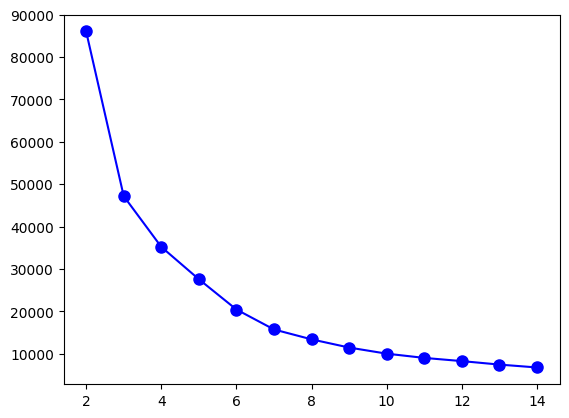

In [92]:
plt.plot(clusters, inertias, 'bo-', markersize=8)
plt.show()

In [93]:
from sklearn.metrics import silhouette_score

ss = []
for l in labels:
    ss.append(silhouette_score(df, labels=l))

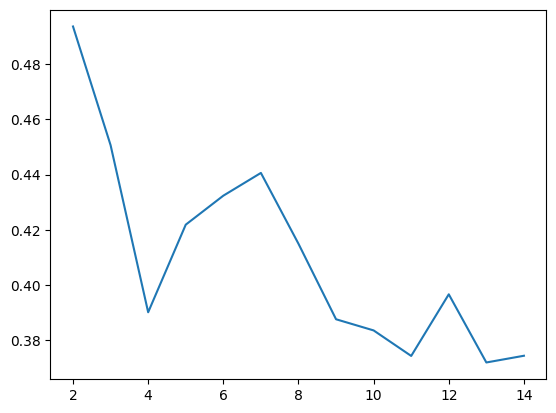

In [94]:
plt.plot(clusters,ss)

In [95]:
# Optimal clusters
kmodel = KMeans(n_clusters=7)
kmodel.fit(df)
centroids = kmodel.cluster_centers_
centroids

array([[  20.19476814,  -88.12757743],
       [  18.89254908,  -98.64959496],
       [  26.32674658, -108.86093109],
       [  20.68940949, -103.51047919],
       [  17.02783684,  -93.55000511],
       [  31.74171046, -115.81528947],
       [  24.45752397,  -99.19322036]])

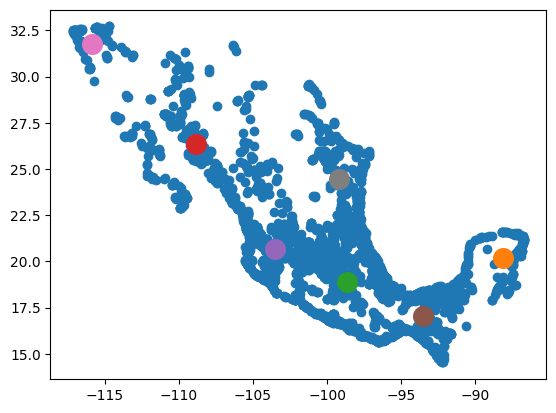

In [96]:
plt.scatter(df.LONGITUD, df.LATITUD)
for i in range(len(centroids)):    
    plt.scatter(centroids[i][1],centroids[i][0], label = i, s= 200)
plt.show()